### Functional API
- Helps in solving non-linear topology where Sequential models fail

### Training a basic functional API model
- A very simple architecture

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
from keras.models import Model
from keras.layers import *

In [35]:
model = Model(inputs=input1, outputs=[output1,output2])

In [34]:
input1 = Input(shape=(2,))

In [36]:
from keras.layers import Dense

layer1 = Dense(128,activation='relu')(input)
layer2 = Dense(64, activation='relu')(layer1)


output1 = Dense(1,activation='sigmoid')(layer2)
output2 = Dense(1,activation='linear')(layer2)

In [37]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 128)               │             384 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 64)                │           8,256 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 1)                 │              65 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │              65 │ dense_5[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 8,770 (34.26 KB)

 Trainable params: 8,770 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

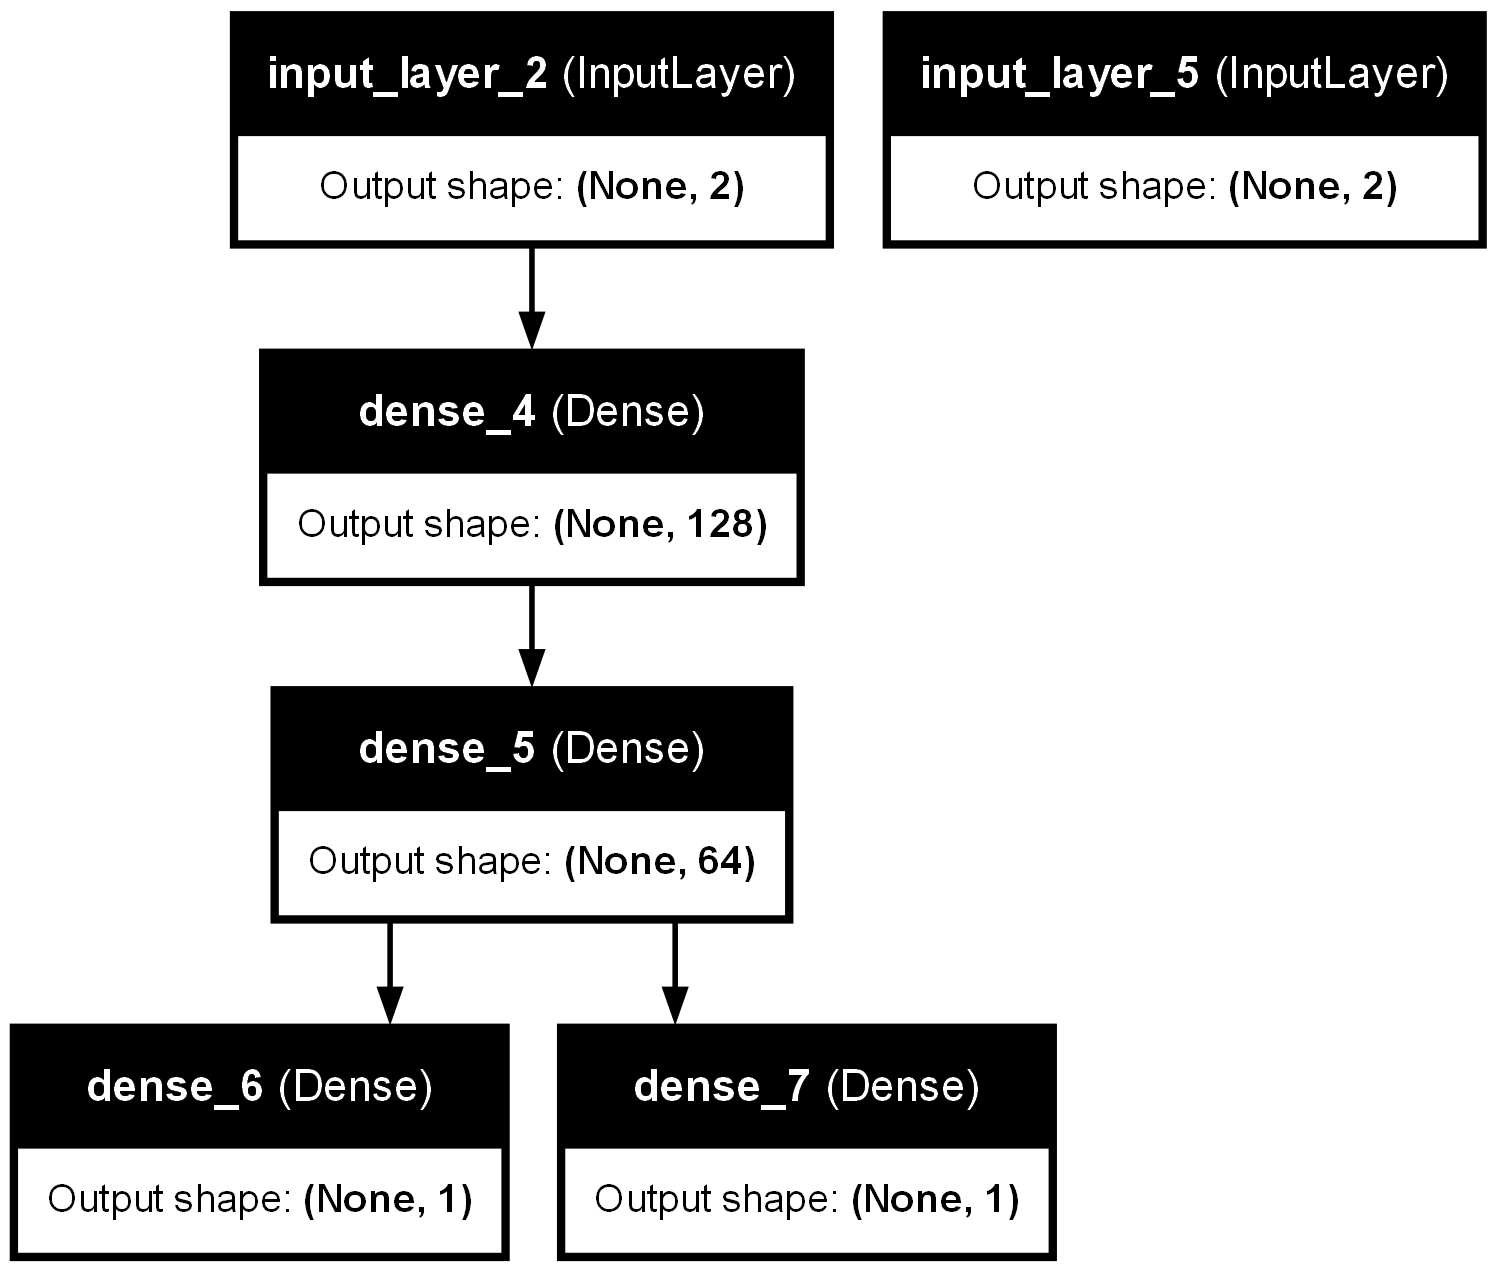

In [38]:
from keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True)

### Taking two inputs at a time

In [39]:
x1 = Input(shape=(2,))
x2 = Input(shape=(3,))

In [40]:
hidden_x1 = Dense(64,activation='relu')(x1)
hidden_x2 = Dense(128,activation='relu')(hidden_x1)



hidden_x2 = Dense(256,activation='relu')(x2)
hidden_x2 = Dense(64,activation='relu')(hidden_x2)


In [41]:
combine_result = concatenate([hidden_x1, hidden_x2])

In [42]:
combine_result.shape

(None, 128)

In [45]:
combine_hidden = Dense(128,activation='relu')(combine_result)

output_layer = Dense(1,activation='sigmoid')(combine_hidden)

In [46]:
model_2_inputs = Model(inputs =[x1,x2], outputs = output_layer)

In [47]:
model_2_inputs.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_6 (InputLayer)    │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 256)               │           1,024 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 64)                │             192 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 64)                │          16,448 │ dense_25[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_3 (Concatenate)   │ (None, 128)               │               0 │ dense_23[0][0],            │
│                               │                           │                 │ dense_26[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_29 (Dense)              │ (None, 128)               │          16,512 │ concatenate_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_30 (Dense)              │ (None, 1)                 │             129 │ dense_29[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 34,305 (134.00 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 0 (0.00 B)

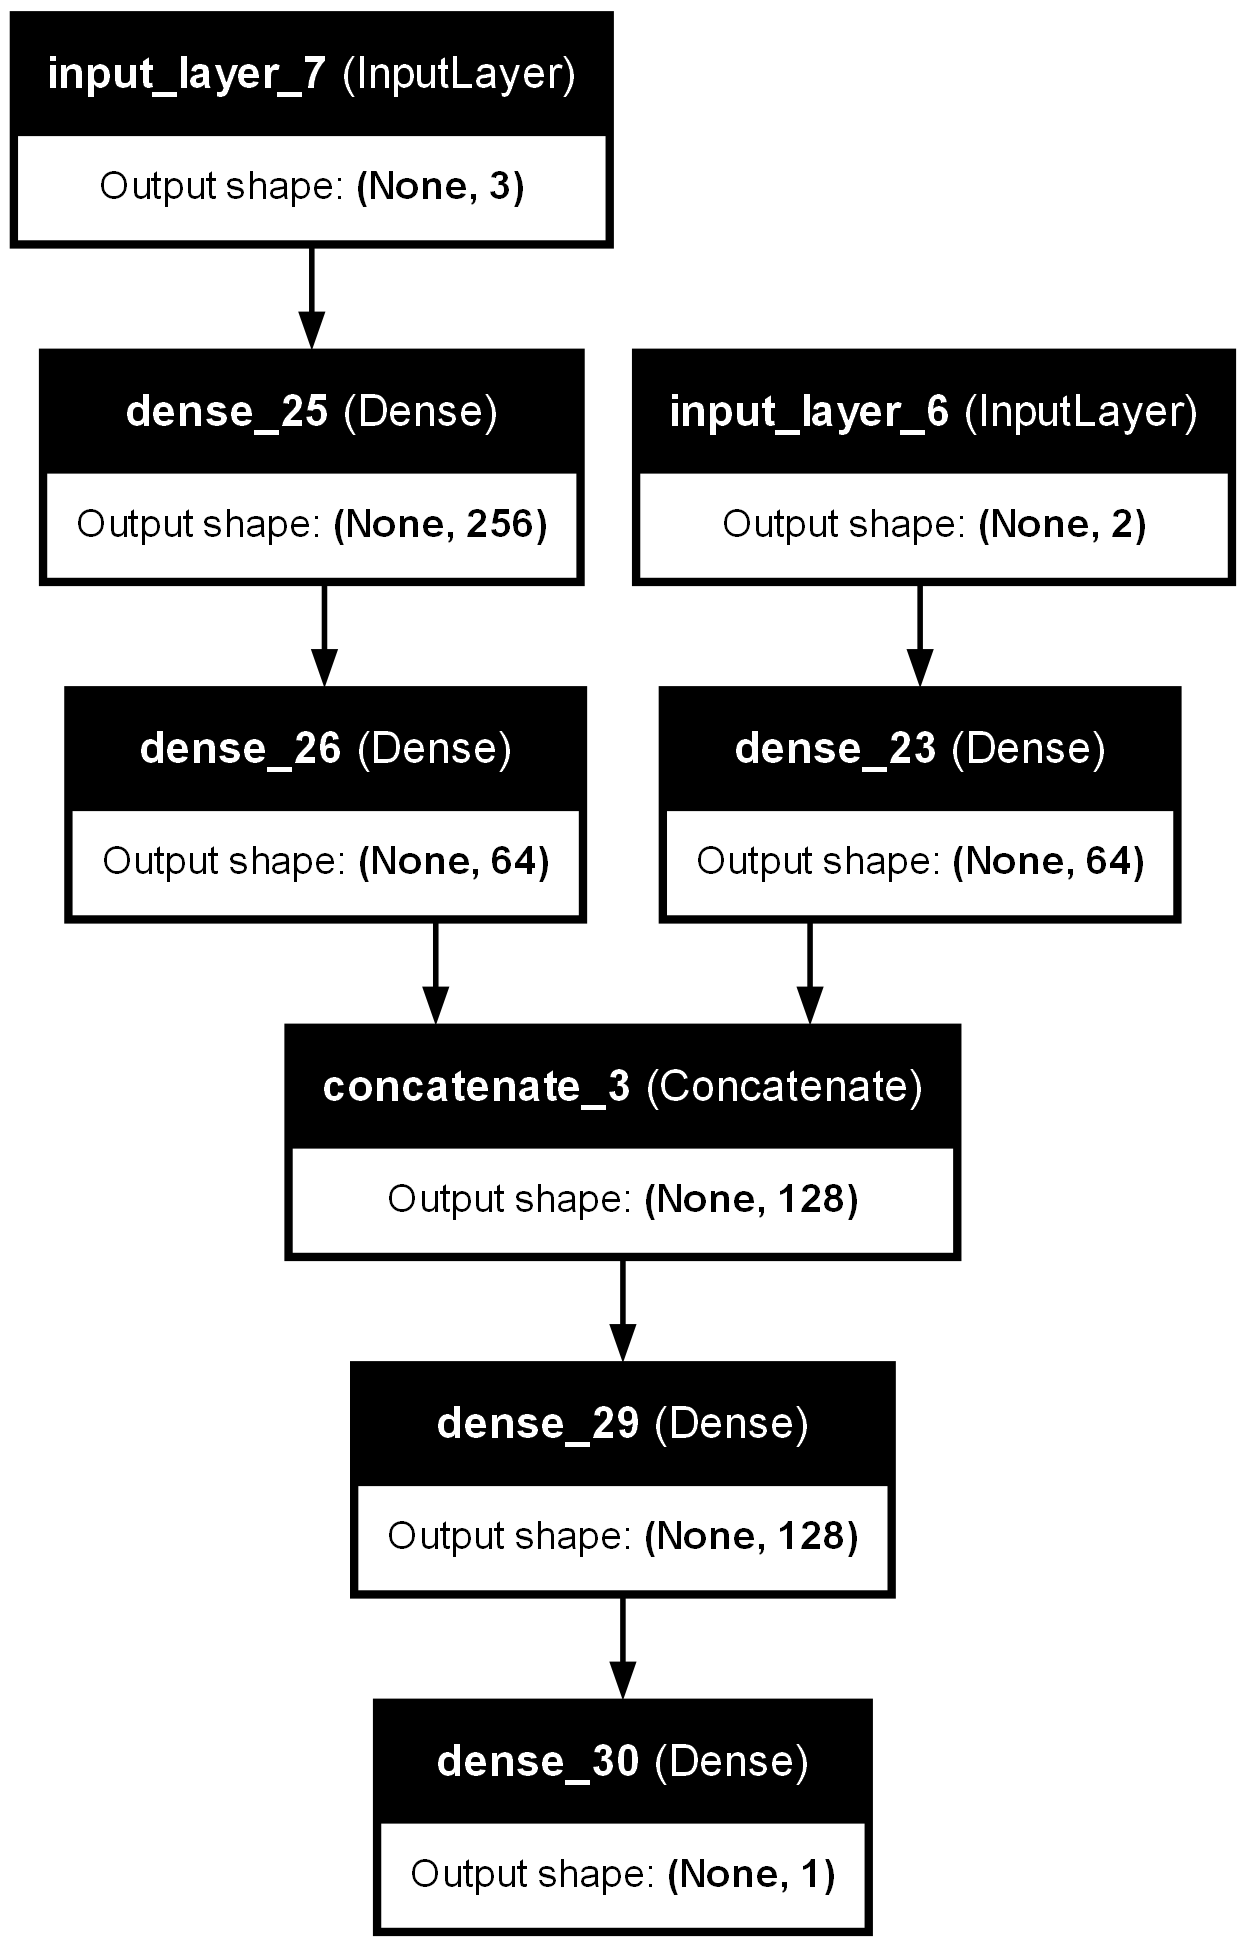

In [48]:
plot_model(model_2_inputs,show_shapes=True,show_layer_names=True)